# Predicting Achievable Sales and Visualization


Maximum Sales Achievable: $1,172,738,489.14

Brand and Cosmetic with Highest Revenue:
Brand          Kaybeauty
Segment          Perfume
New Sales    45407465.78
Name: 7, dtype: object

Sales, Margin, Trend, and Contribution for Each Unit:
  Portfolio      Geography  Category      Brand   Segment  Sales ($)  \
0    Luxury           Asia  Skincare  Kaybeauty   Bronzer     160268   
1    Luxury         Africa    Makeup  Kaybeauty   Perfume     114820   
2    Beauty  North America    Makeup    L'Oreal   Perfume     308795   
3    Luxury         Europe    Makeup  Kaybeauty   Shampoo      81551   
4    Beauty  South America    Makeup        MAC  Lipstick     224073   

   Margin (%)  Trend (%)  Contribution (%)  
0        0.34       0.06          0.014682  
1        0.49       0.16          0.010519  
2        0.11       0.08          0.028289  
3        0.29       0.16          0.007471  
4        0.22      -0.03          0.020528  


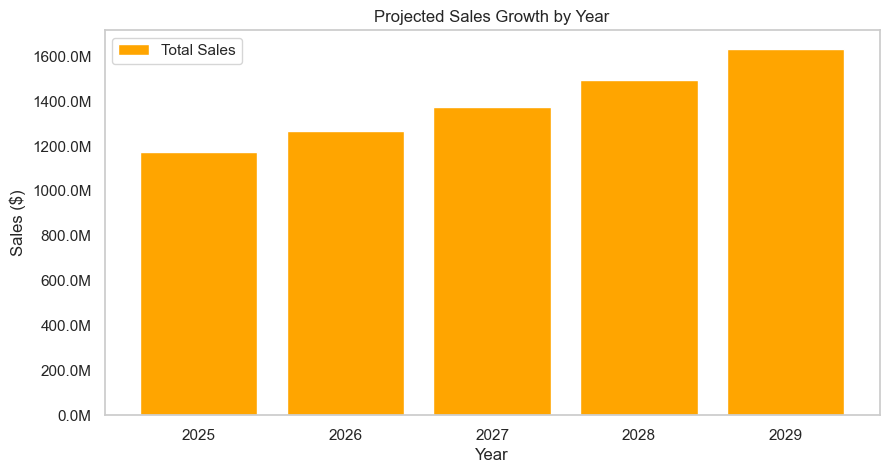

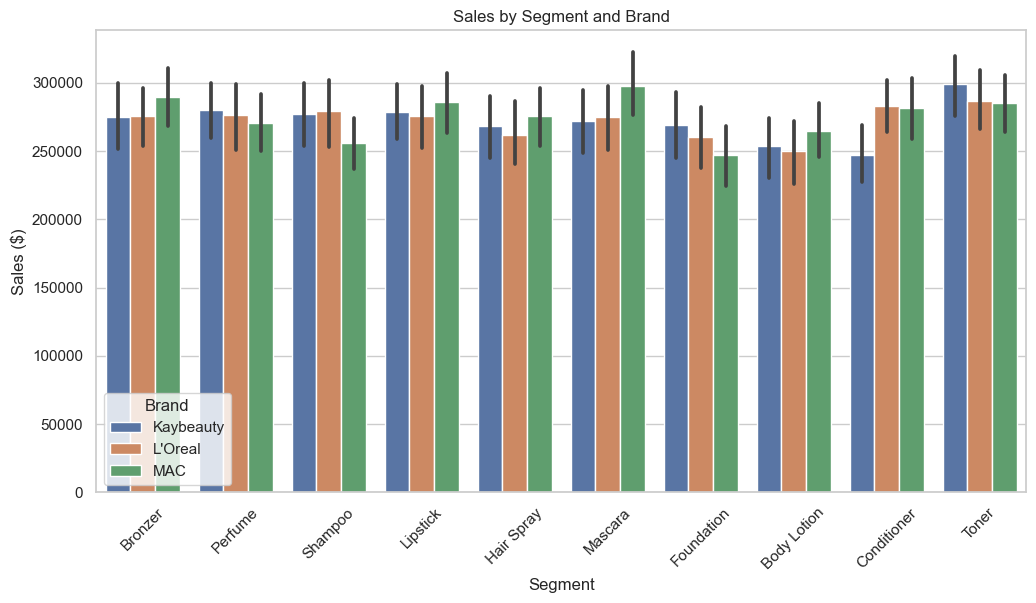

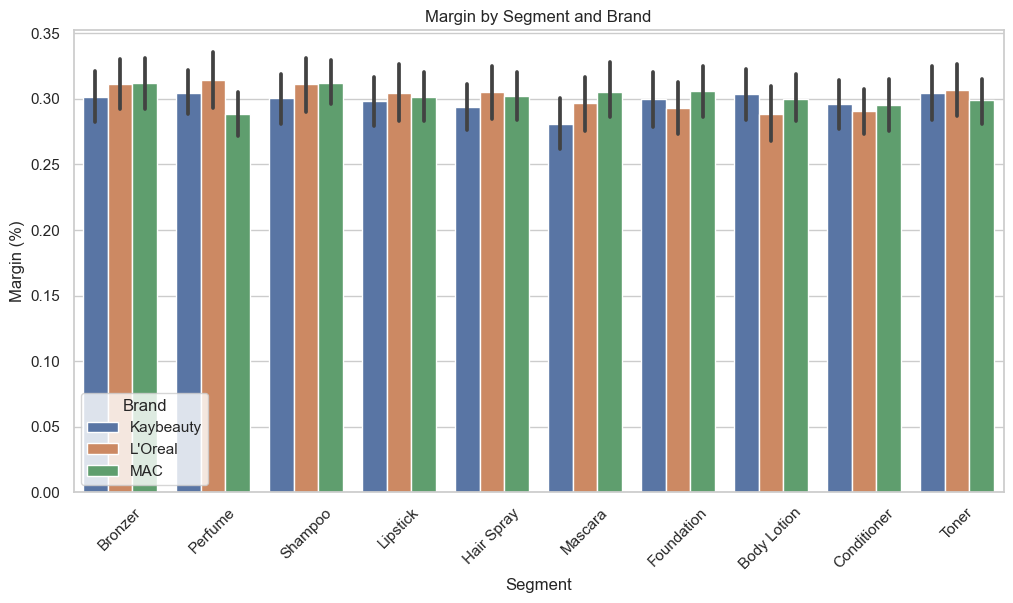


Revenue Comparison by Brand and Cosmetic:
        Brand      Segment    New Sales
0   Kaybeauty  Body Lotion  38830169.19
1   Kaybeauty      Bronzer  35788071.71
2   Kaybeauty  Conditioner  38979591.42
3   Kaybeauty   Foundation  33867077.21
4   Kaybeauty   Hair Spray  40452742.33
5   Kaybeauty     Lipstick  43408857.33
6   Kaybeauty      Mascara  37995269.48
7   Kaybeauty      Perfume  45407465.78
8   Kaybeauty      Shampoo  37345732.15
9   Kaybeauty        Toner  38470594.12
10    L'Oreal  Body Lotion  32057115.67
11    L'Oreal      Bronzer  40485853.01
12    L'Oreal  Conditioner  43758411.16
13    L'Oreal   Foundation  36473235.29
14    L'Oreal   Hair Spray  36172032.04
15    L'Oreal     Lipstick  39302587.73
16    L'Oreal      Mascara  37119394.27
17    L'Oreal      Perfume  31644916.59
18    L'Oreal      Shampoo  35196817.36
19    L'Oreal        Toner  39503494.73
20        MAC  Body Lotion  38736820.63
21        MAC      Bronzer  43638567.89
22        MAC  Conditioner  40877605.

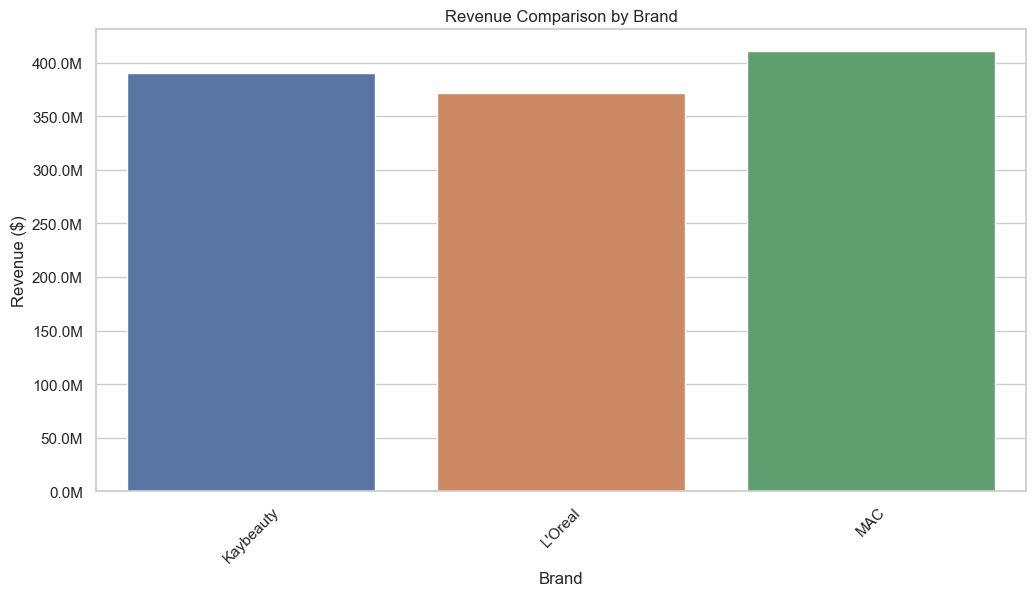

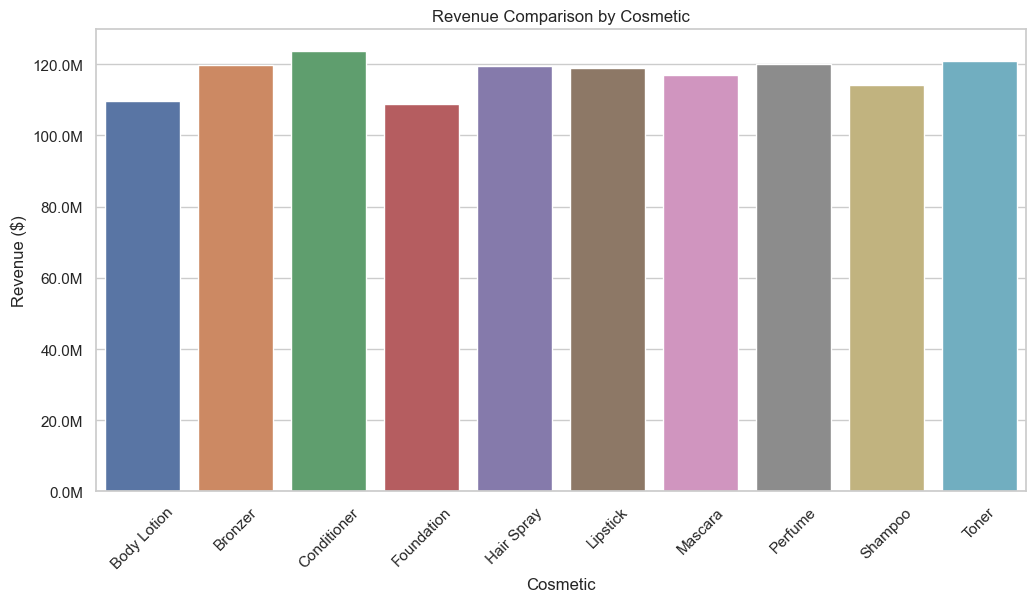

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

sns.set(style="whitegrid")

# Creating Synthetic Dataset
# -----------------------------------------------------------------------------------------
def create_synthetic_dataset():
    np.random.seed(42)
    # Defininig segments, brands, categories, geographies, and portfolios
    segments = ["Mascara", "Lipstick", "Foundation", "Shampoo", "Conditioner", "Perfume", "Toner", "Bronzer", "Hair Spray", "Body Lotion"]
    brands = ["MAC", "L'Oreal", "Kaybeauty"]
    categories = ["Hair", "Body", "Fragrance", "Makeup", "Skincare"]
    geographies = ["North America", "South America", "Europe", "Asia", "Africa"]
    portfolios = ["Beauty", "Personal Care", "Luxury"]

    # Creating synthetic dataset with 4000 values
    data = []
    for _ in range(4000):
        portfolio = np.random.choice(portfolios)
        geography = np.random.choice(geographies)
        category = np.random.choice(categories)
        brand = np.random.choice(brands)
        segment = np.random.choice(segments)
        sales = np.random.randint(50000, 500000)  # Sales values between 50,000 and 500,000
        margin = round(np.random.uniform(0.1, 0.5), 2)  # Margin is considered between 10% and 50%
        trend = round(np.random.uniform(-0.05, 0.2), 2)  # Trend is considered between -5% and 20%
        contribution = round(np.random.uniform(0.05, 0.3), 2)  # Contribution is considered between 5% and 30%
        data.append([portfolio, geography, category, brand, segment, sales, margin, trend, contribution])

    # column names
    columns = ["Portfolio", "Geography", "Category", "Brand", "Segment", "Sales", "Margin", "Trend", "Contribution"]
    df = pd.DataFrame(data, columns=columns)
    # constraints for (min/max trend and contribution)
    df['Min_Trend'] = df['Trend'] - 0.02  # Minimum trend constraint
    df['Max_Trend'] = df['Trend'] + 0.02  # Maximum trend constraint
    df['Min_Contribution'] = df['Contribution'] - 0.05  # Minimum contribution constraint
    df['Max_Contribution'] = df['Contribution'] + 0.05  # Maximum contribution constraint
    return df

df = create_synthetic_dataset()

# Saving the dataset
df.to_csv("acme_synthetic_dataset.csv", index=False)

# Finding maximum achievable sales
# ======================
def maximize_sales(df):
    # Applying trend constraints
    df['Adjusted_Trend'] = df['Trend'].clip(lower=df['Min_Trend'], upper=df['Max_Trend'])
    df['New Sales'] = df['Sales'] * (1 + df['Adjusted_Trend'])
    total_max_sales = df['New Sales'].sum()
    return df, total_max_sales

max_sales_df, total_max_sales = maximize_sales(df)
print(f"\nMaximum Sales Achievable: ${total_max_sales:,.2f}")


# Identifying Brand and Cosmetic with Highest Revenue
# ======================
def identify_highest_revenue(df):
    # Grouping by Brand and Segment to find the highest revenue
    revenue_by_brand_segment = df.groupby(['Brand', 'Segment'])['New Sales'].sum().reset_index()
    highest_revenue = revenue_by_brand_segment.loc[revenue_by_brand_segment['New Sales'].idxmax()]
    return highest_revenue

highest_revenue = identify_highest_revenue(max_sales_df)
print("\nBrand and Cosmetic with Highest Revenue:")
print(highest_revenue)

# Identifying projected Sales Growth by Year
# ======================
def project_sales_growth(df, years=5):
    # Aggregate sales data by year
    projected_sales = {}
    current_year = 2024  # Start from 2024
    for year in range(1, years + 1):
        projected_sales[current_year + year] = df['Sales'] * (1 + df['Adjusted_Trend']) ** year
    
    projected_df = pd.DataFrame(projected_sales)
    projected_df['Brand'] = df['Brand']
    projected_df['Segment'] = df['Segment']
    return projected_df
projected_df = project_sales_growth(max_sales_df)
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

def show_metrics_for_each_unit(df):
    total_sales = df['Sales'].sum()
    df['Contribution_Percentage'] = (df['Sales'] / total_sales) * 100
    metrics_df = df[['Portfolio', 'Geography', 'Category', 'Brand', 'Segment', 'Sales', 'Margin', 'Trend', 'Contribution_Percentage']]
    metrics_df = metrics_df.rename(columns={
        'Sales': 'Sales ($)',
        'Margin': 'Margin (%)',
        'Trend': 'Trend (%)',
        'Contribution_Percentage': 'Contribution (%)'
    }) 
    return metrics_df

metrics_df = show_metrics_for_each_unit(df)
print("\nSales, Margin, Trend, and Contribution for Each Unit:")
print(metrics_df.head())  # Display the first 5 row
years = list(projected_df.columns[:-2]) 
plt.figure(figsize=(10, 5))
plt.bar(years, [projected_df[year].sum() for year in years], color='orange', label='Total Sales')
plt.xlabel("Year")
plt.ylabel("Sales ($)")
plt.title("Projected Sales Growth by Year")
plt.legend()
plt.grid()
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

# Visualizing Metrics
# ========================================================================================
def visualize_metrics(df):
    #  Sales by Segment
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Segment', y='Sales ($)', hue='Brand', data=df)
    plt.title("Sales by Segment and Brand")
    plt.xlabel("Segment")
    plt.ylabel("Sales ($)")
    plt.xticks(rotation=45)
    plt.show()

    # Margin by Segment
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Segment', y='Margin (%)', hue='Brand', data=df)
    plt.title("Margin by Segment and Brand")
    plt.xlabel("Segment")
    plt.ylabel("Margin (%)")
    plt.xticks(rotation=45)
    plt.show()
visualize_metrics(metrics_df)

# Comparing Revenue by Brand and Cosmetics
# ======================================================================================
def compare_brands_cosmetics(df):
    # Grouping by Brand and Segment to compare revenue
    revenue_comparison = df.groupby(['Brand', 'Segment'])['New Sales'].sum().reset_index()
    return revenue_comparison
revenue_comparison = compare_brands_cosmetics(max_sales_df)
print("\nRevenue Comparison by Brand and Cosmetic:")
print(revenue_comparison)

# Revenue Comparison by Brand
plt.figure(figsize=(12, 6))
sns.barplot(x='Brand', y='New Sales', data=revenue_comparison.groupby('Brand')['New Sales'].sum().reset_index())
plt.title("Revenue Comparison by Brand")
plt.xlabel("Brand")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

# Revenue Comparison by Cosmetic
plt.figure(figsize=(12, 6))
sns.barplot(x='Segment', y='New Sales', data=revenue_comparison.groupby('Segment')['New Sales'].sum().reset_index())
plt.title("Revenue Comparison by Cosmetic")
plt.xlabel("Cosmetic")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

# Yearly and Monthly Sales Trend

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



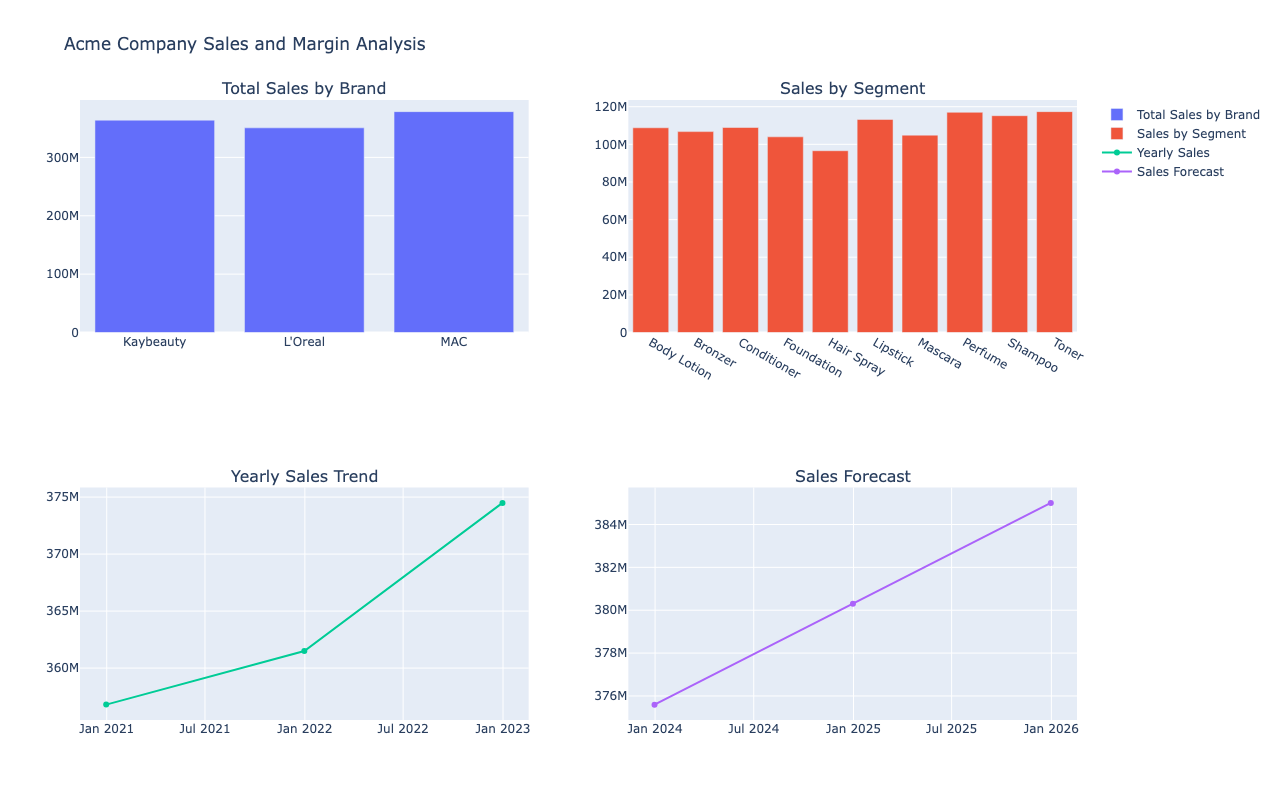

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from plotly.subplots import make_subplots
import plotly.graph_objects as go
sns.set(style="whitegrid")

# Creating Synthetic Dataset with Time Series
# ======================
def create_synthetic_dataset():
    # Set seed for reproducibility
    np.random.seed(42)
    segments = ["Mascara", "Lipstick", "Foundation", "Shampoo", "Conditioner", "Perfume", "Toner", "Bronzer", "Hair Spray", "Body Lotion"]
    brands = ["MAC", "L'Oreal", "Kaybeauty"]
    categories = ["Hair", "Body", "Fragrance", "Makeup", "Skincare"]
    geographies = ["North America", "South America", "Europe", "Asia", "Africa"]
    portfolios = ["Beauty", "Personal Care", "Luxury"]


    data = []
    start_date = pd.to_datetime("2020-01-01")
    for _ in range(4000):
        portfolio = np.random.choice(portfolios)
        geography = np.random.choice(geographies)
        category = np.random.choice(categories)
        brand = np.random.choice(brands)
        segment = np.random.choice(segments)
        sales = np.random.randint(50000, 500000)  # Sales between 50,000 and 500,000
        margin = round(np.random.uniform(0.1, 0.5), 2)  # Margin between 10% and 50%
        trend = round(np.random.uniform(-0.05, 0.2), 2)  # Trend between -5% and 20%
        contribution = round(np.random.uniform(0.05, 0.3), 2)  # Contribution between 5% and 30%
        date = start_date + pd.DateOffset(days=np.random.randint(0, 365 * 3))  # Random date within 3 years
        data.append([portfolio, geography, category, brand, segment, sales, margin, trend, contribution, date])

    # column names
    columns = ["Portfolio", "Geography", "Category", "Brand", "Segment", "Sales", "Margin", "Trend", "Contribution", "Date"]
    df = pd.DataFrame(data, columns=columns)
    return df

df = create_synthetic_dataset()

# Time Series Analysis to predict Yearly Trends 
# =================================================================================
def time_series_analysis(df):
    # Aggregate sales by year
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    yearly_sales = df['Sales'].resample('Y').sum().reset_index()
    model = ExponentialSmoothing(yearly_sales['Sales'], trend="add", seasonal=None).fit()
    forecast = model.forecast(steps=3)  # Forecast next 3 years
    # DataFrame for the forecast
    forecast_dates = pd.date_range(start=yearly_sales['Date'].iloc[-1], periods=4, freq='Y')[1:]
    forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast})

    return yearly_sales, forecast_df
yearly_sales, forecast_df = time_series_analysis(df)

# Visualizations
# ======================
def create_visualizations(df, yearly_sales, forecast_df):
    # figure with subplots
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=("Total Sales by Brand", "Sales by Segment", "Yearly Sales Trend", "Sales Forecast")
    )
    # Plot 1: Total Sales by Brand
    sales_by_brand = df.groupby('Brand')['Sales'].sum().reset_index()
    fig.add_trace(
        go.Bar(x=sales_by_brand['Brand'], y=sales_by_brand['Sales'], name="Total Sales by Brand"),
        row=1, col=1
    )
    # Plot 2: Sales by Segment
    sales_by_segment = df.groupby('Segment')['Sales'].sum().reset_index()
    fig.add_trace(
        go.Bar(x=sales_by_segment['Segment'], y=sales_by_segment['Sales'], name="Sales by Segment"),
        row=1, col=2
    )
    # Plot 3: Yearly Sales Trend
    fig.add_trace(
        go.Scatter(x=yearly_sales['Date'], y=yearly_sales['Sales'], mode='lines+markers', name="Yearly Sales"),
        row=2, col=1
    )
    # Plot 4: Sales Forecast
    fig.add_trace(
        go.Scatter(x=forecast_df['Date'], y=forecast_df['Forecast'], mode='lines+markers', name="Sales Forecast"),
        row=2, col=2
    )
    fig.update_layout(
        title_text="Acme Company Sales and Margin Analysis",
        showlegend=True,
        height=800,
        width=1200
    )
    fig.show()
create_visualizations(df, yearly_sales, forecast_df)